In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Problem 1

In [4]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

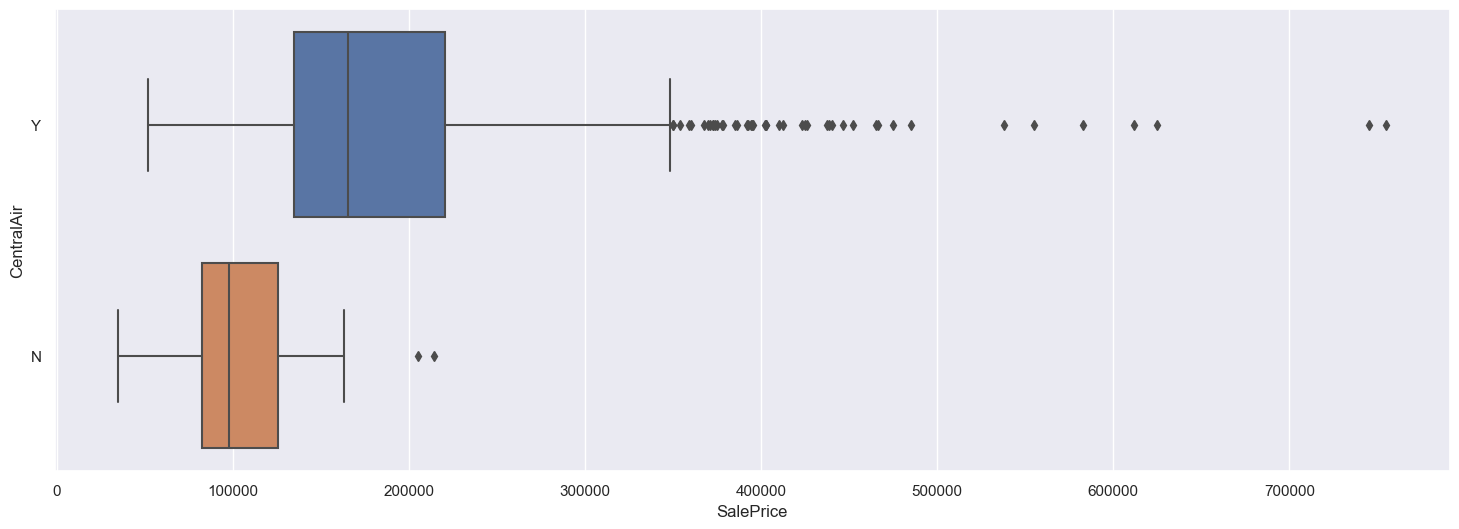

In [183]:
ctrair = pd.DataFrame(data['CentralAir'])        # Response
saleprice = pd.DataFrame(data['SalePrice'])  # Predictor

X_train, X_test, y_train, y_test = train_test_split(saleprice, ctrair, test_size = 0.20)

joint = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = joint, orient = "h")


## Depth 2

11 67 1 1089
2 15 1 274
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082
True postive rate 		: 0.9990825688073395
False positive rate 		: 0.8589743589743589

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548
True postive rate 		: 0.9963636363636363
False positive rate 		: 0.8823529411764706




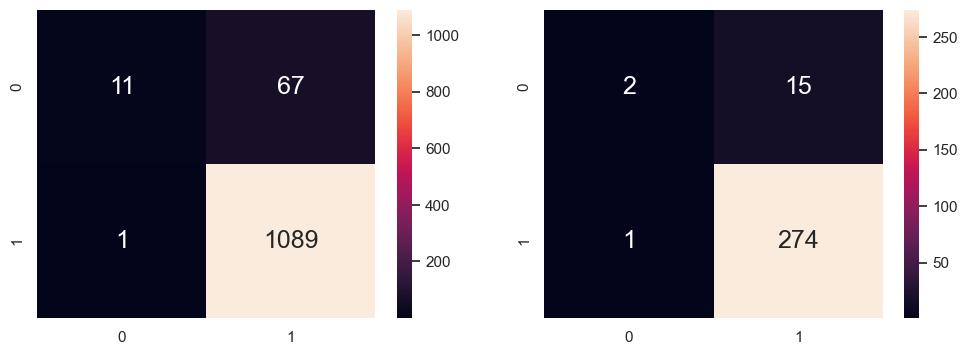

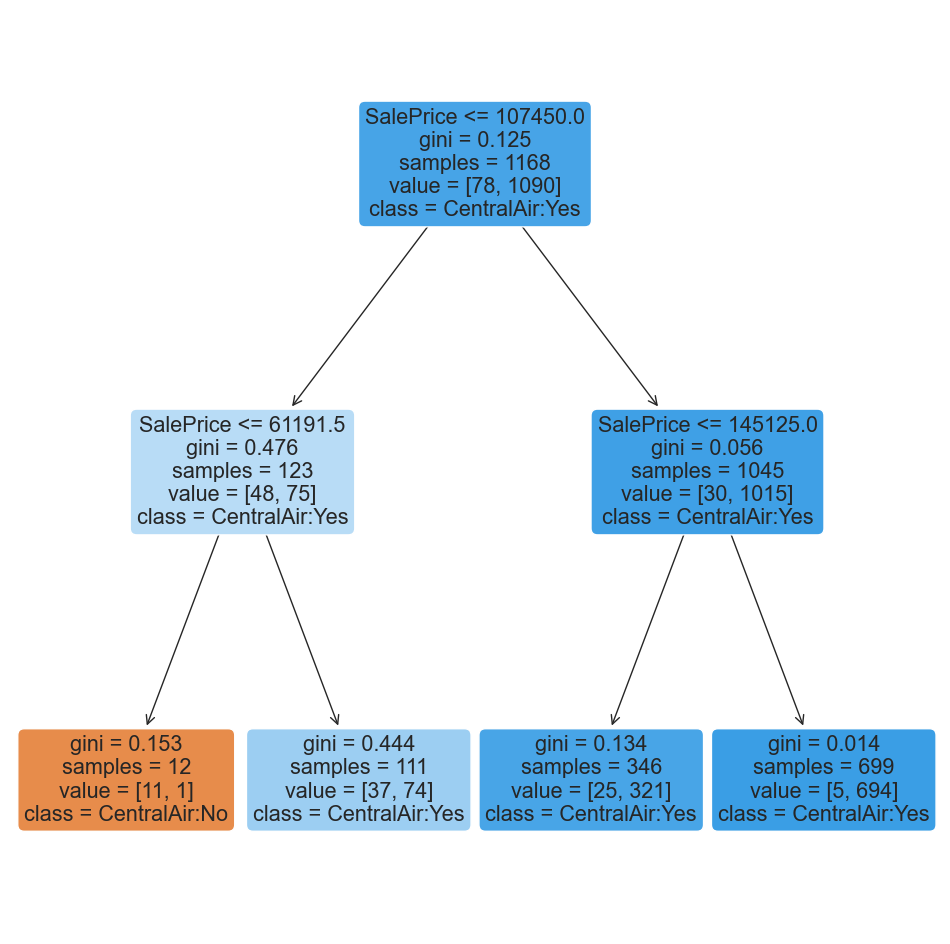

In [184]:
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CentralAir
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred, labels=['N', 'Y']).ravel()
print(tn_train, fp_train, fn_train, tp_train)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred, labels=['N', 'Y']).ravel()
print(tn_test, fp_test, fn_test, tp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True postive rate \t\t:", (tp_train/(tp_train+fn_train)))
print("False positive rate \t\t:", (fp_train/(tn_train+fp_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True postive rate \t\t:", (tp_test/(tp_test+fn_test)))
print("False positive rate \t\t:", (fp_test/(tn_test+fp_test)))
print()


print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAir:No","CentralAir:Yes"])
plt.show()

## Depth 4

20 58 5 1085
2 15 1 274
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164
True postive rate 		: 0.9954128440366973
False positive rate 		: 0.7435897435897436

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548
True postive rate 		: 0.9963636363636363
False positive rate 		: 0.8823529411764706



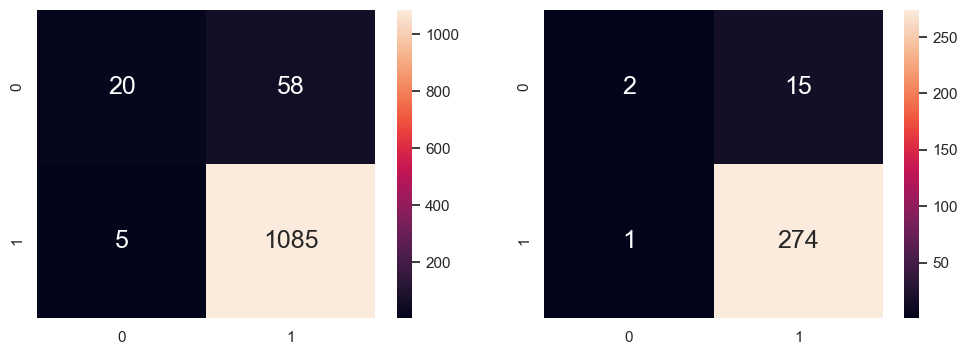

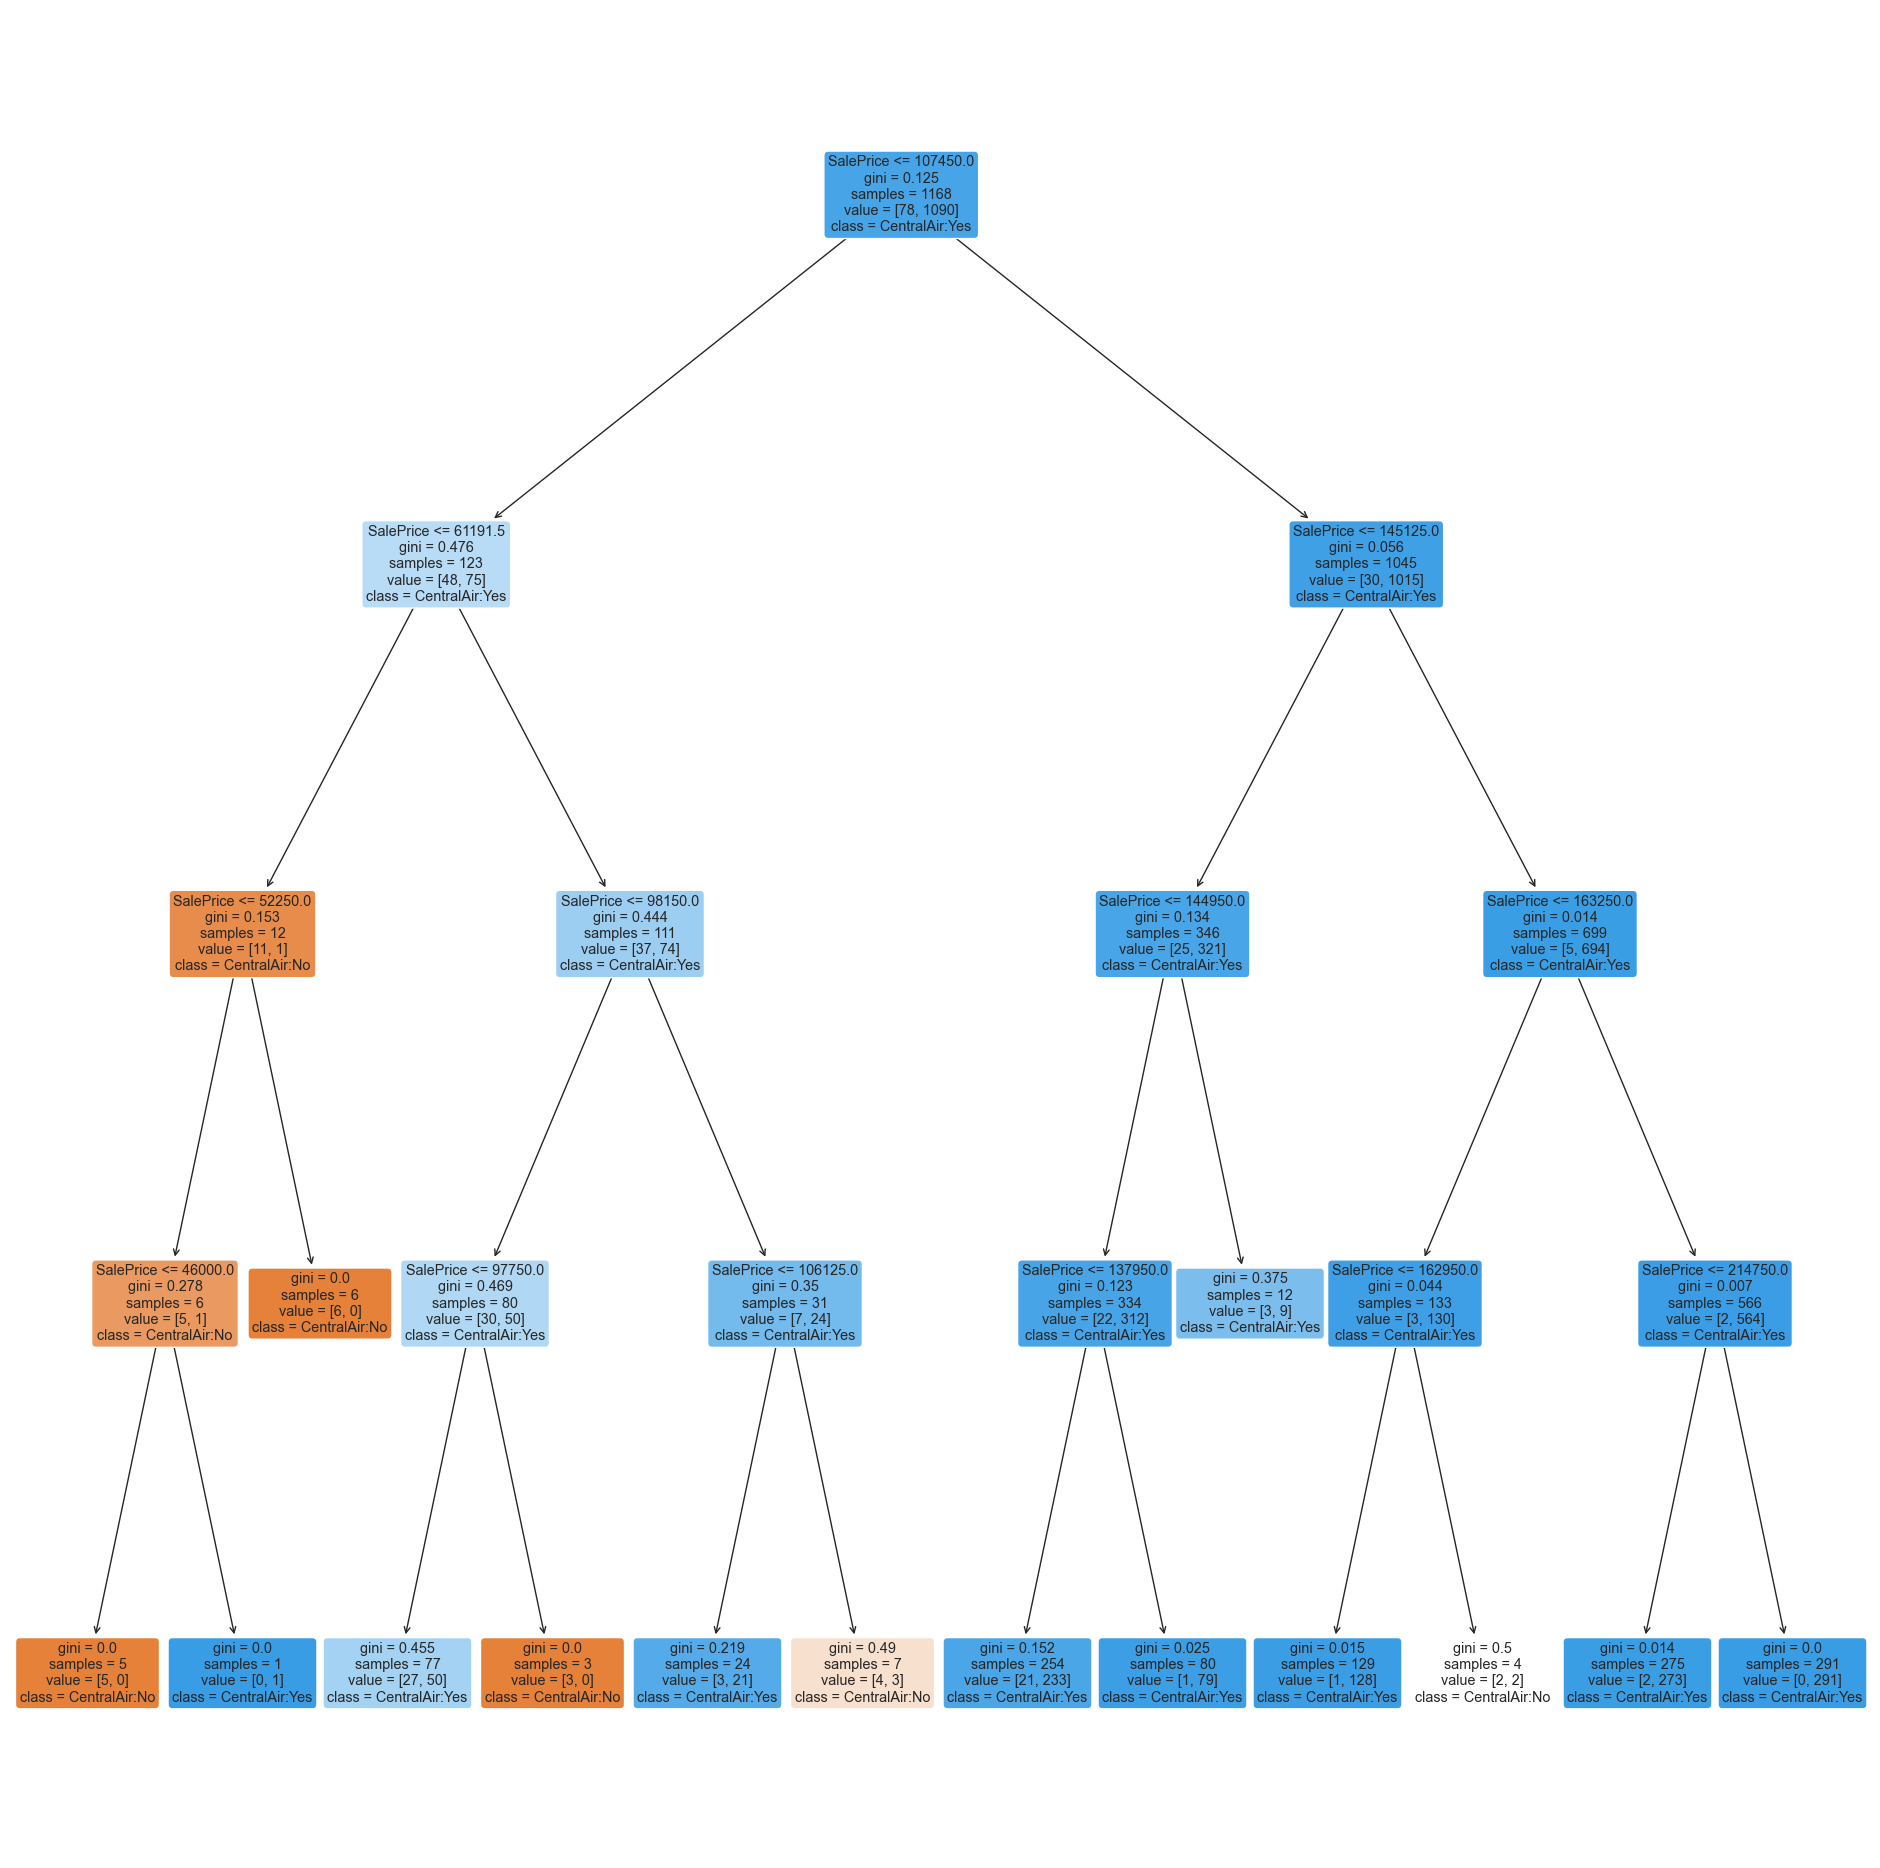

In [185]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CentralAir
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

tn_train2, fp_train2, fn_train2, tp_train2 = confusion_matrix(y_train, y_train_pred, labels=['N', 'Y']).ravel()
print(tn_train2, fp_train2, fn_train2, tp_train2)

tn_test2, fp_test2, fn_test2, tp_test2 = confusion_matrix(y_test, y_test_pred, labels=['N', 'Y']).ravel()
print(tn_test2, fp_test2, fn_test2, tp_test2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True postive rate \t\t:", (tp_train2/(tp_train2+fn_train2)))
print("False positive rate \t\t:", (fp_train2/(tn_train2+fp_train2)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True postive rate \t\t:", (tp_test2/(tp_test2+fn_test2)))
print("False positive rate \t\t:", (fp_test2/(tn_test2+fp_test2)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAir:No","CentralAir:Yes"])
plt.show()

## Ans:
Overall, model of depth 4 did better. 

For the model of depth 4 the Classification Accuracy of the train data 0.946, is higher than that of the model of depth 2, at 0.942. 

The true positive rate of model with depth 4, 0.995, is lower than that of model with depth 2, at 0.999 and the false positive rate of model with depth 4 is also higher, at 0.858 compared to 0.744.

For the Classification Accuray on the test data, both models are at 0.945, and both model have same value for true positive rate and false positive rate are at 0.996 and 0.88.

Overall, model of depth 4 is highly accurate at predicting both positive and negative values as well, since it has highest classification accuracy and a rather robust true positive rate which is not too much worse than the model of depth 2.

Thus, generally, model with depth of 4 is better.

### Depth 2
Train Dataset

Classification Accuracy 	: 0.9417808219178082

True postive rate 		: 0.9990825688073395

False positive rate 		: 0.8589743589743589

Test Dataset

Classification Accuracy 	: 0.9452054794520548

True postive rate 		: 0.9963636363636363

False positive rate 		: 0.8823529411764706


### Depth 4

Train Dataset

Classification Accuracy 	: 0.9460616438356164

True postive rate 		: 0.9954128440366973

False positive rate 		: 0.7435897435897436


Test Dataset

Classification Accuracy 	: 0.9452054794520548

True postive rate 		: 0.9963636363636363

False positive rate 		: 0.8823529411764706


# Problem 2

## Overall Qual

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

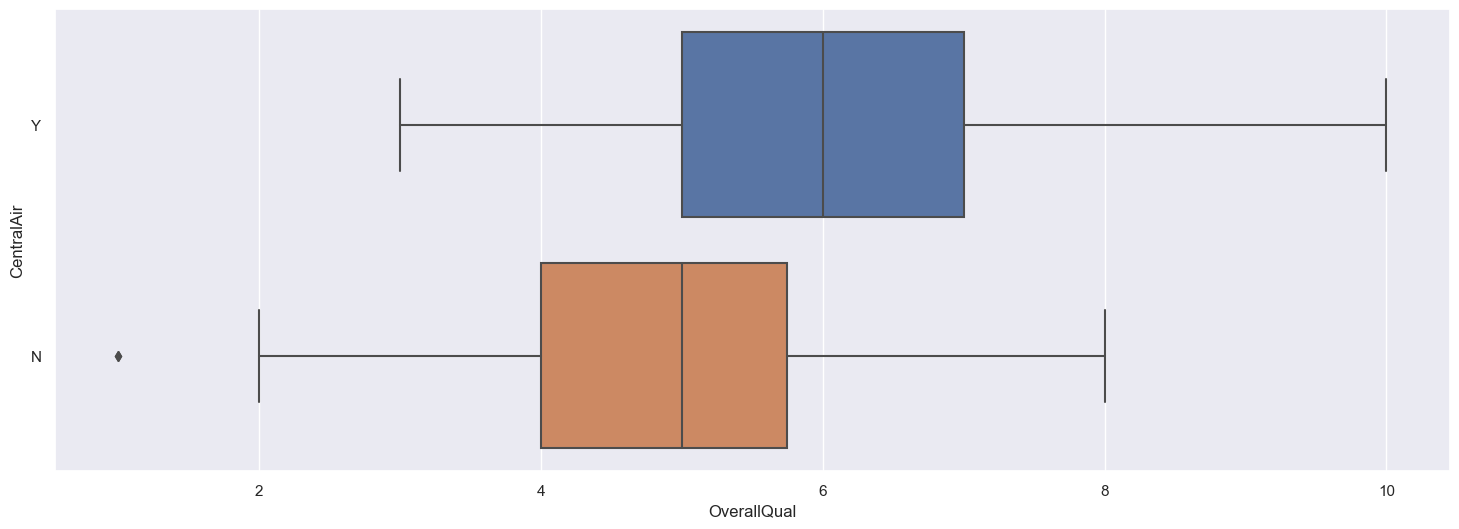

In [93]:
ctrair = pd.DataFrame(data['CentralAir'])     # Response
qual = pd.DataFrame(data['OverallQual'])      # Predictor

X_train2, X_test2, y_train2, y_test2 = train_test_split(qual, ctrair, test_size = 0.20)

joint2 = pd.concat([X_train2, y_train2], axis = 1).reindex(X_train2.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = joint2, orient = "h")


13 65 8 1082
3 14 1 274
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375
True postive rate 		: 0.9926605504587156
False positive rate 		: 0.8333333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014
True postive rate 		: 0.9963636363636363
False positive rate 		: 0.8235294117647058



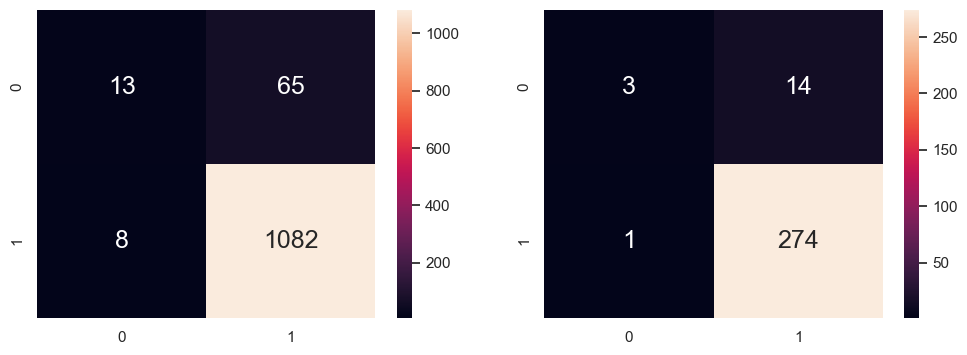

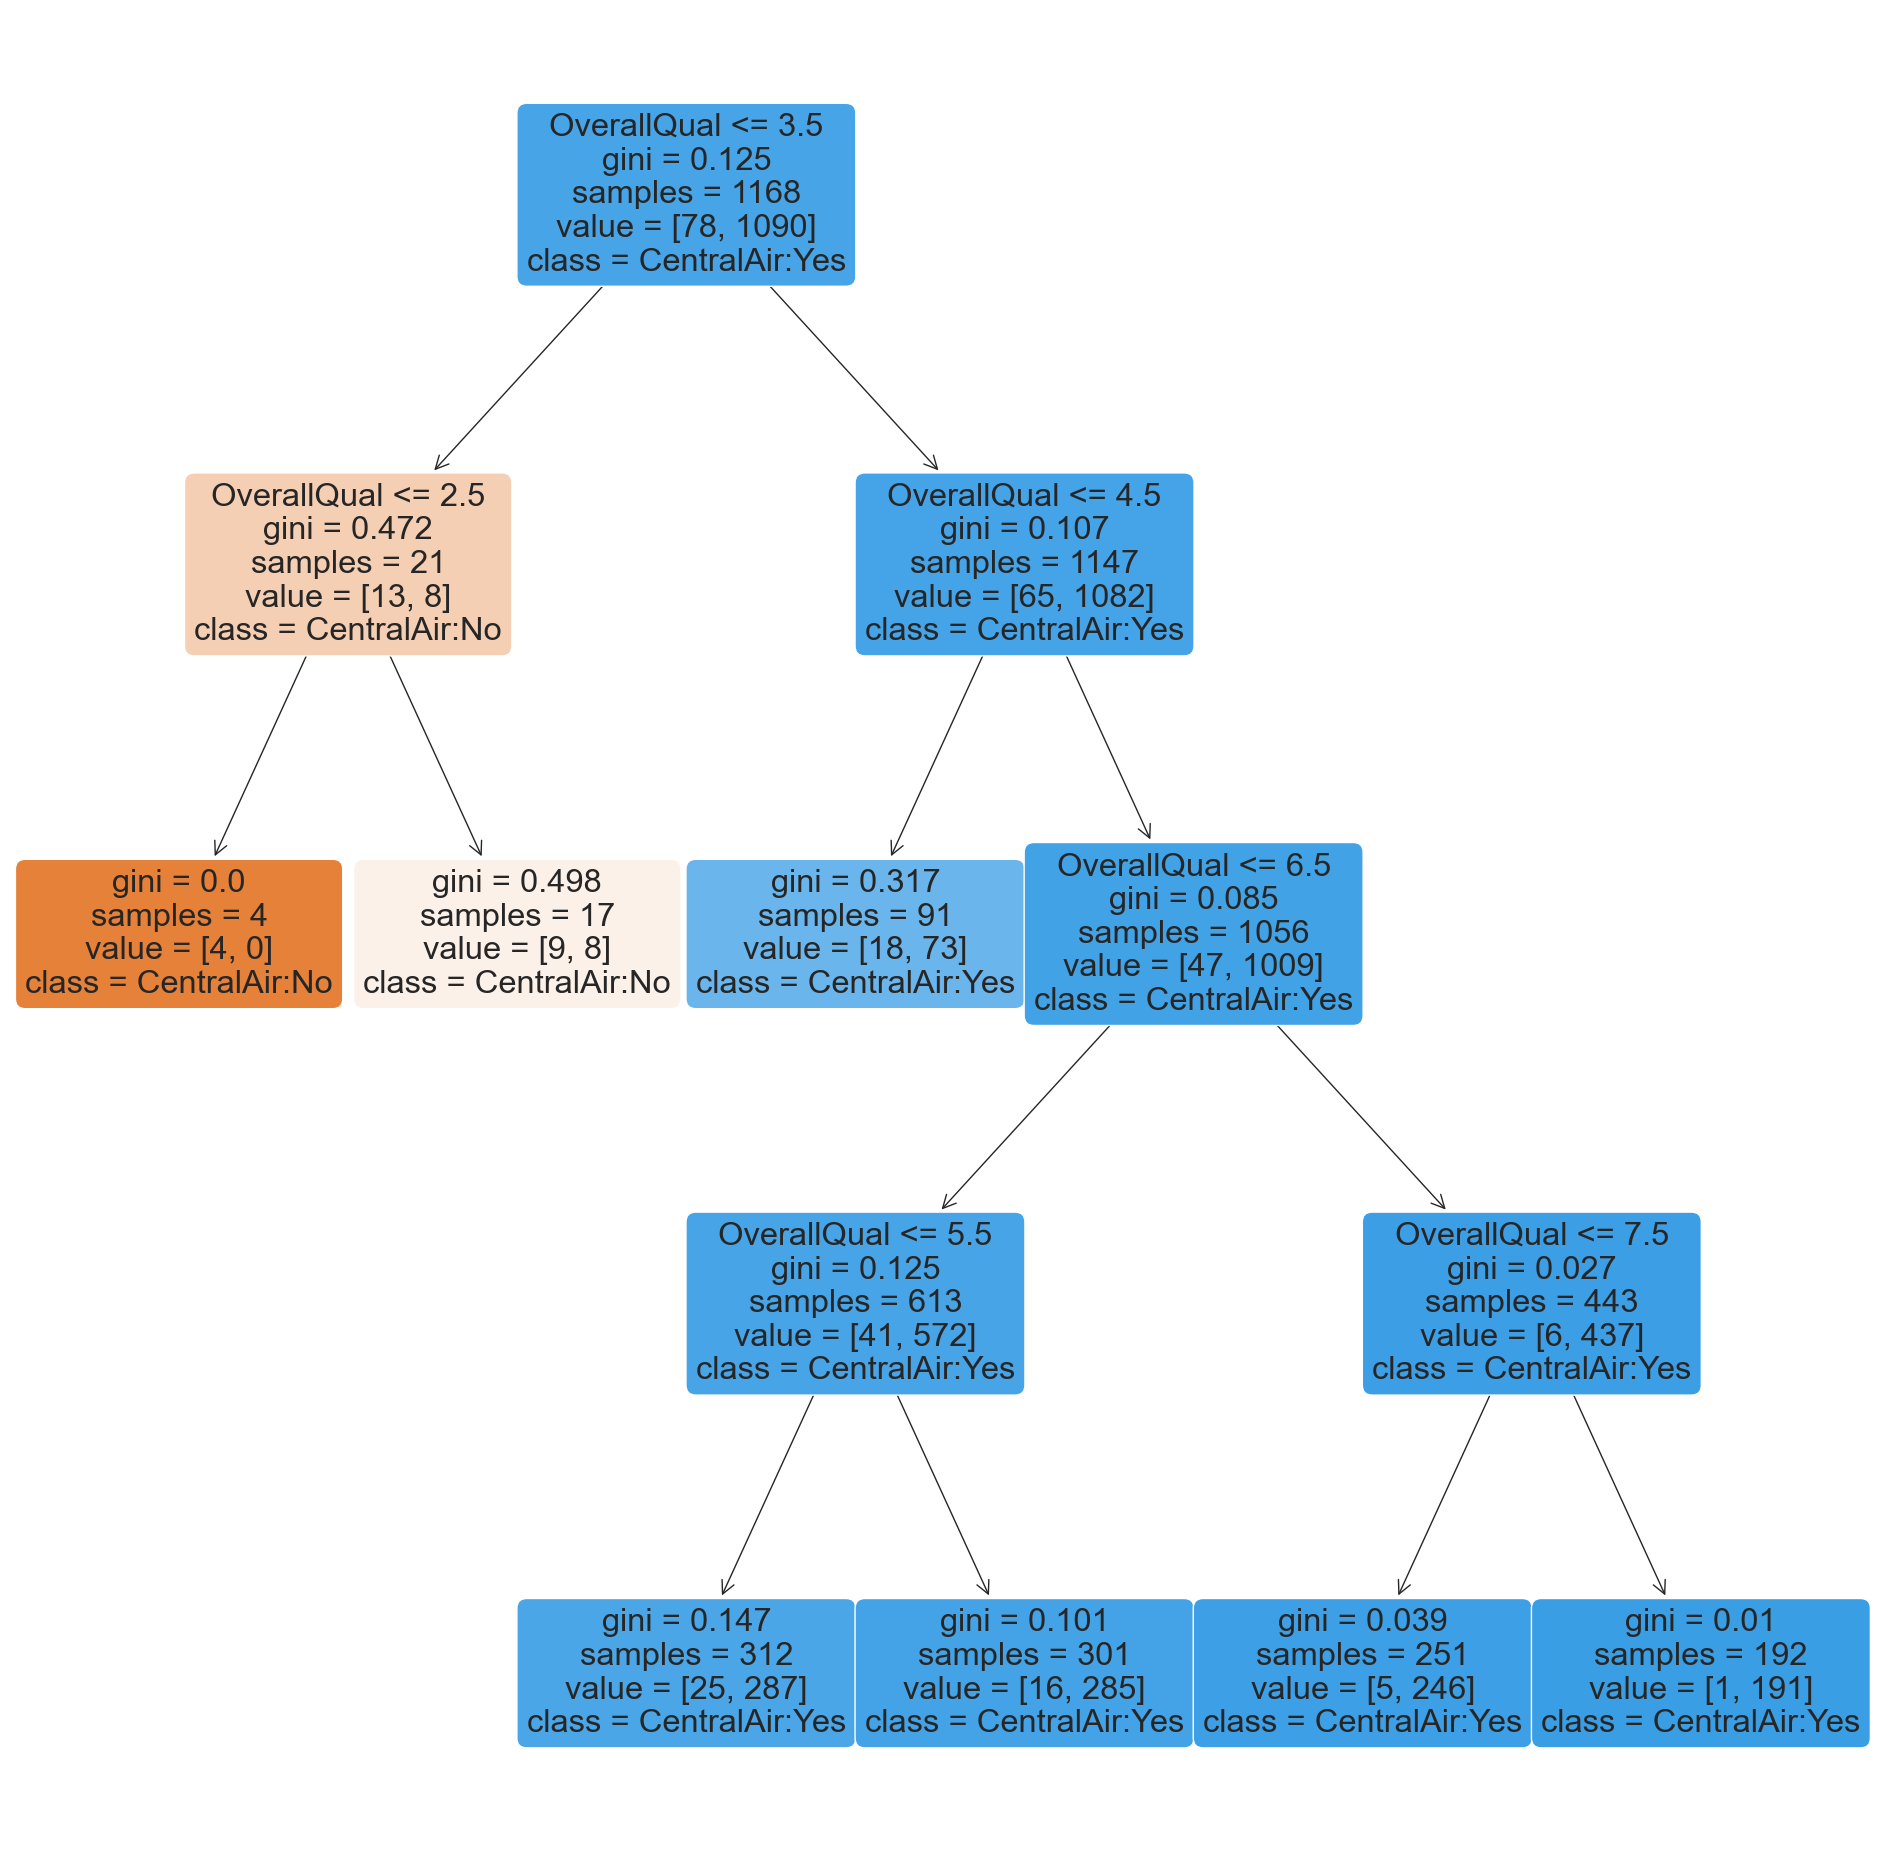

In [99]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train2, y_train2)                    # train the decision tree model

# Predict CentralAir
y_train_pred2 = dectree.predict(X_train2)
y_test_pred2 = dectree.predict(X_test2)

tn_train3, fp_train3, fn_train3, tp_train3 = confusion_matrix(y_train2, y_train_pred2, labels=['N', 'Y']).ravel()
print(tn_train3, fp_train3, fn_train3, tp_train3)

tn_test3, fp_test3, fn_test3, tp_test3 = confusion_matrix(y_test2, y_test_pred2, labels=['N', 'Y']).ravel()
print(tn_test3, fp_test3, fn_test3, tp_test3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train2, y_train2))
print("True postive rate \t\t:", (tp_train3/(tp_train3+fn_train3)))
print("False positive rate \t\t:", (fp_train3/(tn_train3+fp_train3)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test2, y_test2))
print("True postive rate \t\t:", (tp_test3/(tp_test3+fn_test3)))
print("False positive rate \t\t:", (fp_test3/(tn_test3+fp_test3)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train2, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test2, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["CentralAir:No","CentralAir:Yes"])
plt.show()

## YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

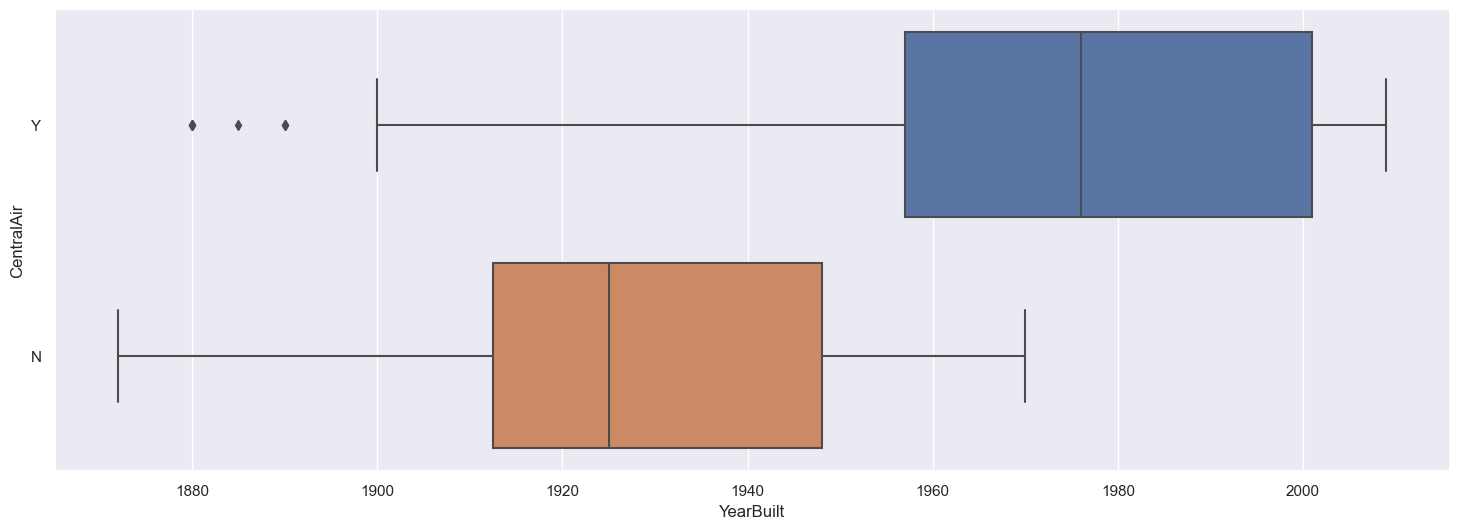

In [102]:
ctrair = pd.DataFrame(data['CentralAir'])     # Response
yrbuilt = pd.DataFrame(data['YearBuilt'])      # Predictor

X_train3, X_test3, y_train3, y_test3 = train_test_split(yrbuilt, ctrair, test_size = 0.20)

joint3 = pd.concat([X_train3, y_train3], axis = 1).reindex(X_train3.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = joint3, orient = "h")


21 50 17 1080
4 20 8 260
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698
True postive rate 		: 0.9845031905195989
False positive rate 		: 0.704225352112676

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9041095890410958
True postive rate 		: 0.9701492537313433
False positive rate 		: 0.8333333333333334



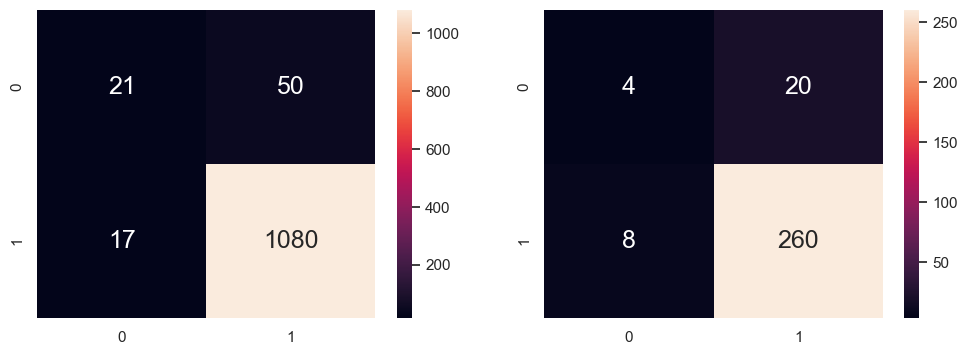

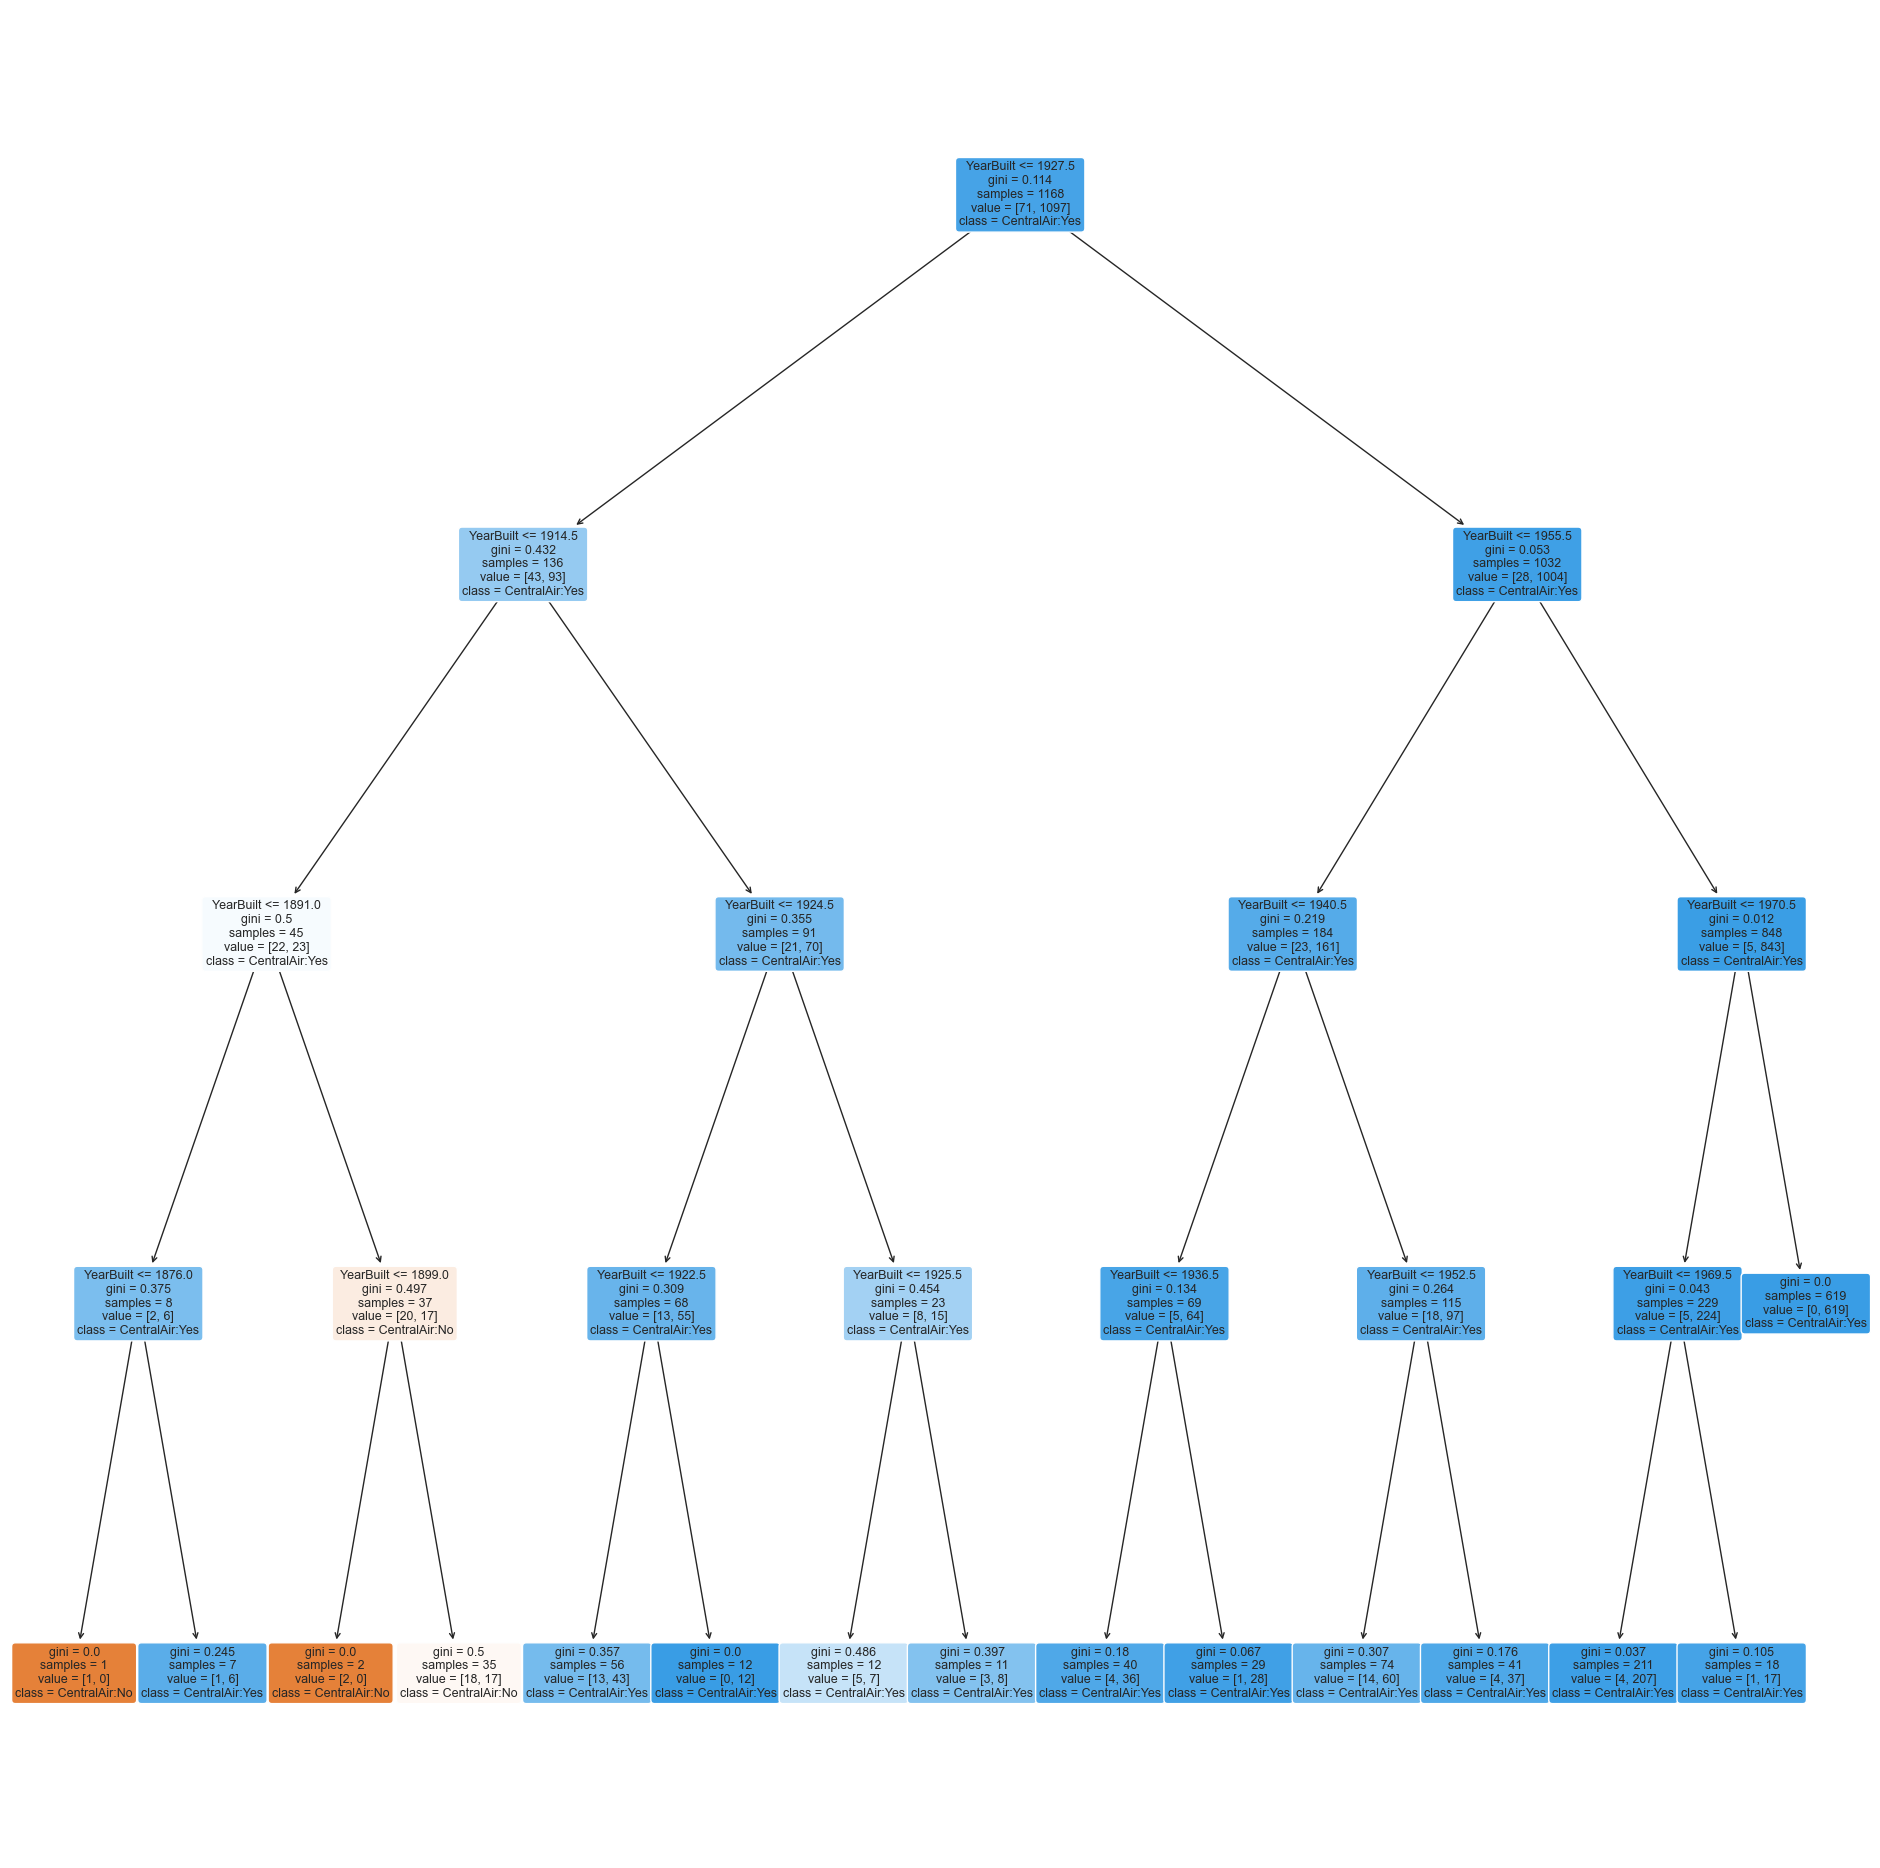

In [104]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train3, y_train3)                    # train the decision tree model

# Predict CentralAir
y_train_pred3 = dectree.predict(X_train3)
y_test_pred3 = dectree.predict(X_test3)

tn_train4, fp_train4, fn_train4, tp_train4 = confusion_matrix(y_train3, y_train_pred3, labels=['N', 'Y']).ravel()
print(tn_train4, fp_train4, fn_train4, tp_train4)

tn_test4, fp_test4, fn_test4, tp_test4 = confusion_matrix(y_test3, y_test_pred3, labels=['N', 'Y']).ravel()
print(tn_test4, fp_test4, fn_test4, tp_test4)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train3, y_train3))
print("True postive rate \t\t:", (tp_train4/(tp_train4+fn_train4)))
print("False positive rate \t\t:", (fp_train4/(tn_train4+fp_train4)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test3, y_test3))
print("True postive rate \t\t:", (tp_test4/(tp_test4+fn_test4)))
print("False positive rate \t\t:", (fp_test4/(tn_test4+fp_test4)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train3, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test3, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["CentralAir:No","CentralAir:Yes"])
plt.show()

## Ans:

### Classification Accuracy
SalePrice has the higher clssifiction accuracy for both train (0.946) and test data(0.945) set compared to YearBuilt (0.942 and  0.904 respectively).

However, while SalePrice has higher classification accuracy for train data (0.946) than that of OverallQual's train data (0.938), SalePrice's classification accuracy for test data (0.945) is lower than that of OverallQual's test data (0.948).

### True Positive rate
Saleprice have the best true positive rate for both its train (0.995) and test data (0.996) compared to OverallQual's true positive rate for both its train(0.993) and test data (0.996), and YearBuilt's true positive rate for both its train(0.985) and test data(0.970).

### False Positive rate
The false positive rate for train data for YearBuilt (0.704) is best, compared to OverQual's train data set (0.833) and slightly better than SalePrice's train data set (0.744).

Yet for the test data set, OverQual has the better FPR(0.823) compared to SalePrice's FPR(0.882) and YearBuilt's FPR(0.833).

### Conclusion
However, we can still see that generally, SalePrice is still the betteer predictor. It has the better classification accuracy for both the train and test data set, while also having a rather good true positive rate and a not too worse of false positive rate compared to the other variables. Therefore, we can conclude that SalePrice is the better variable to be used as a predictor.


### SalePrice

Train Dataset

Classification Accuracy 	: 0.9460616438356164

True postive rate 		: 0.9954128440366973

False positive rate 		: 0.7435897435897436


Test Dataset

Classification Accuracy 	: 0.9452054794520548

True postive rate 		: 0.9963636363636363

False positive rate 		: 0.8823529411764706


### OverallQual
Train Dataset

Classification Accuracy 	: 0.9375

True postive rate 		    : 0.9926605504587156

False positive rate 		: 0.8333333333333334

Test Dataset

Classification Accuracy 	: 0.9486301369863014

True postive rate 		    : 0.9963636363636363

False positive rate 		: 0.8235294117647058


### YearBuilt
Train Dataset

Classification Accuracy 	: 0.9426369863013698

True postive rate 		    : 0.9845031905195989

False positive rate 		: 0.704225352112676


Test Dataset

Classification Accuracy 	: 0.9041095890410958

True postive rate 		    : 0.9701492537313433

False positive rate 		: 0.8333333333333334



# Problem 3

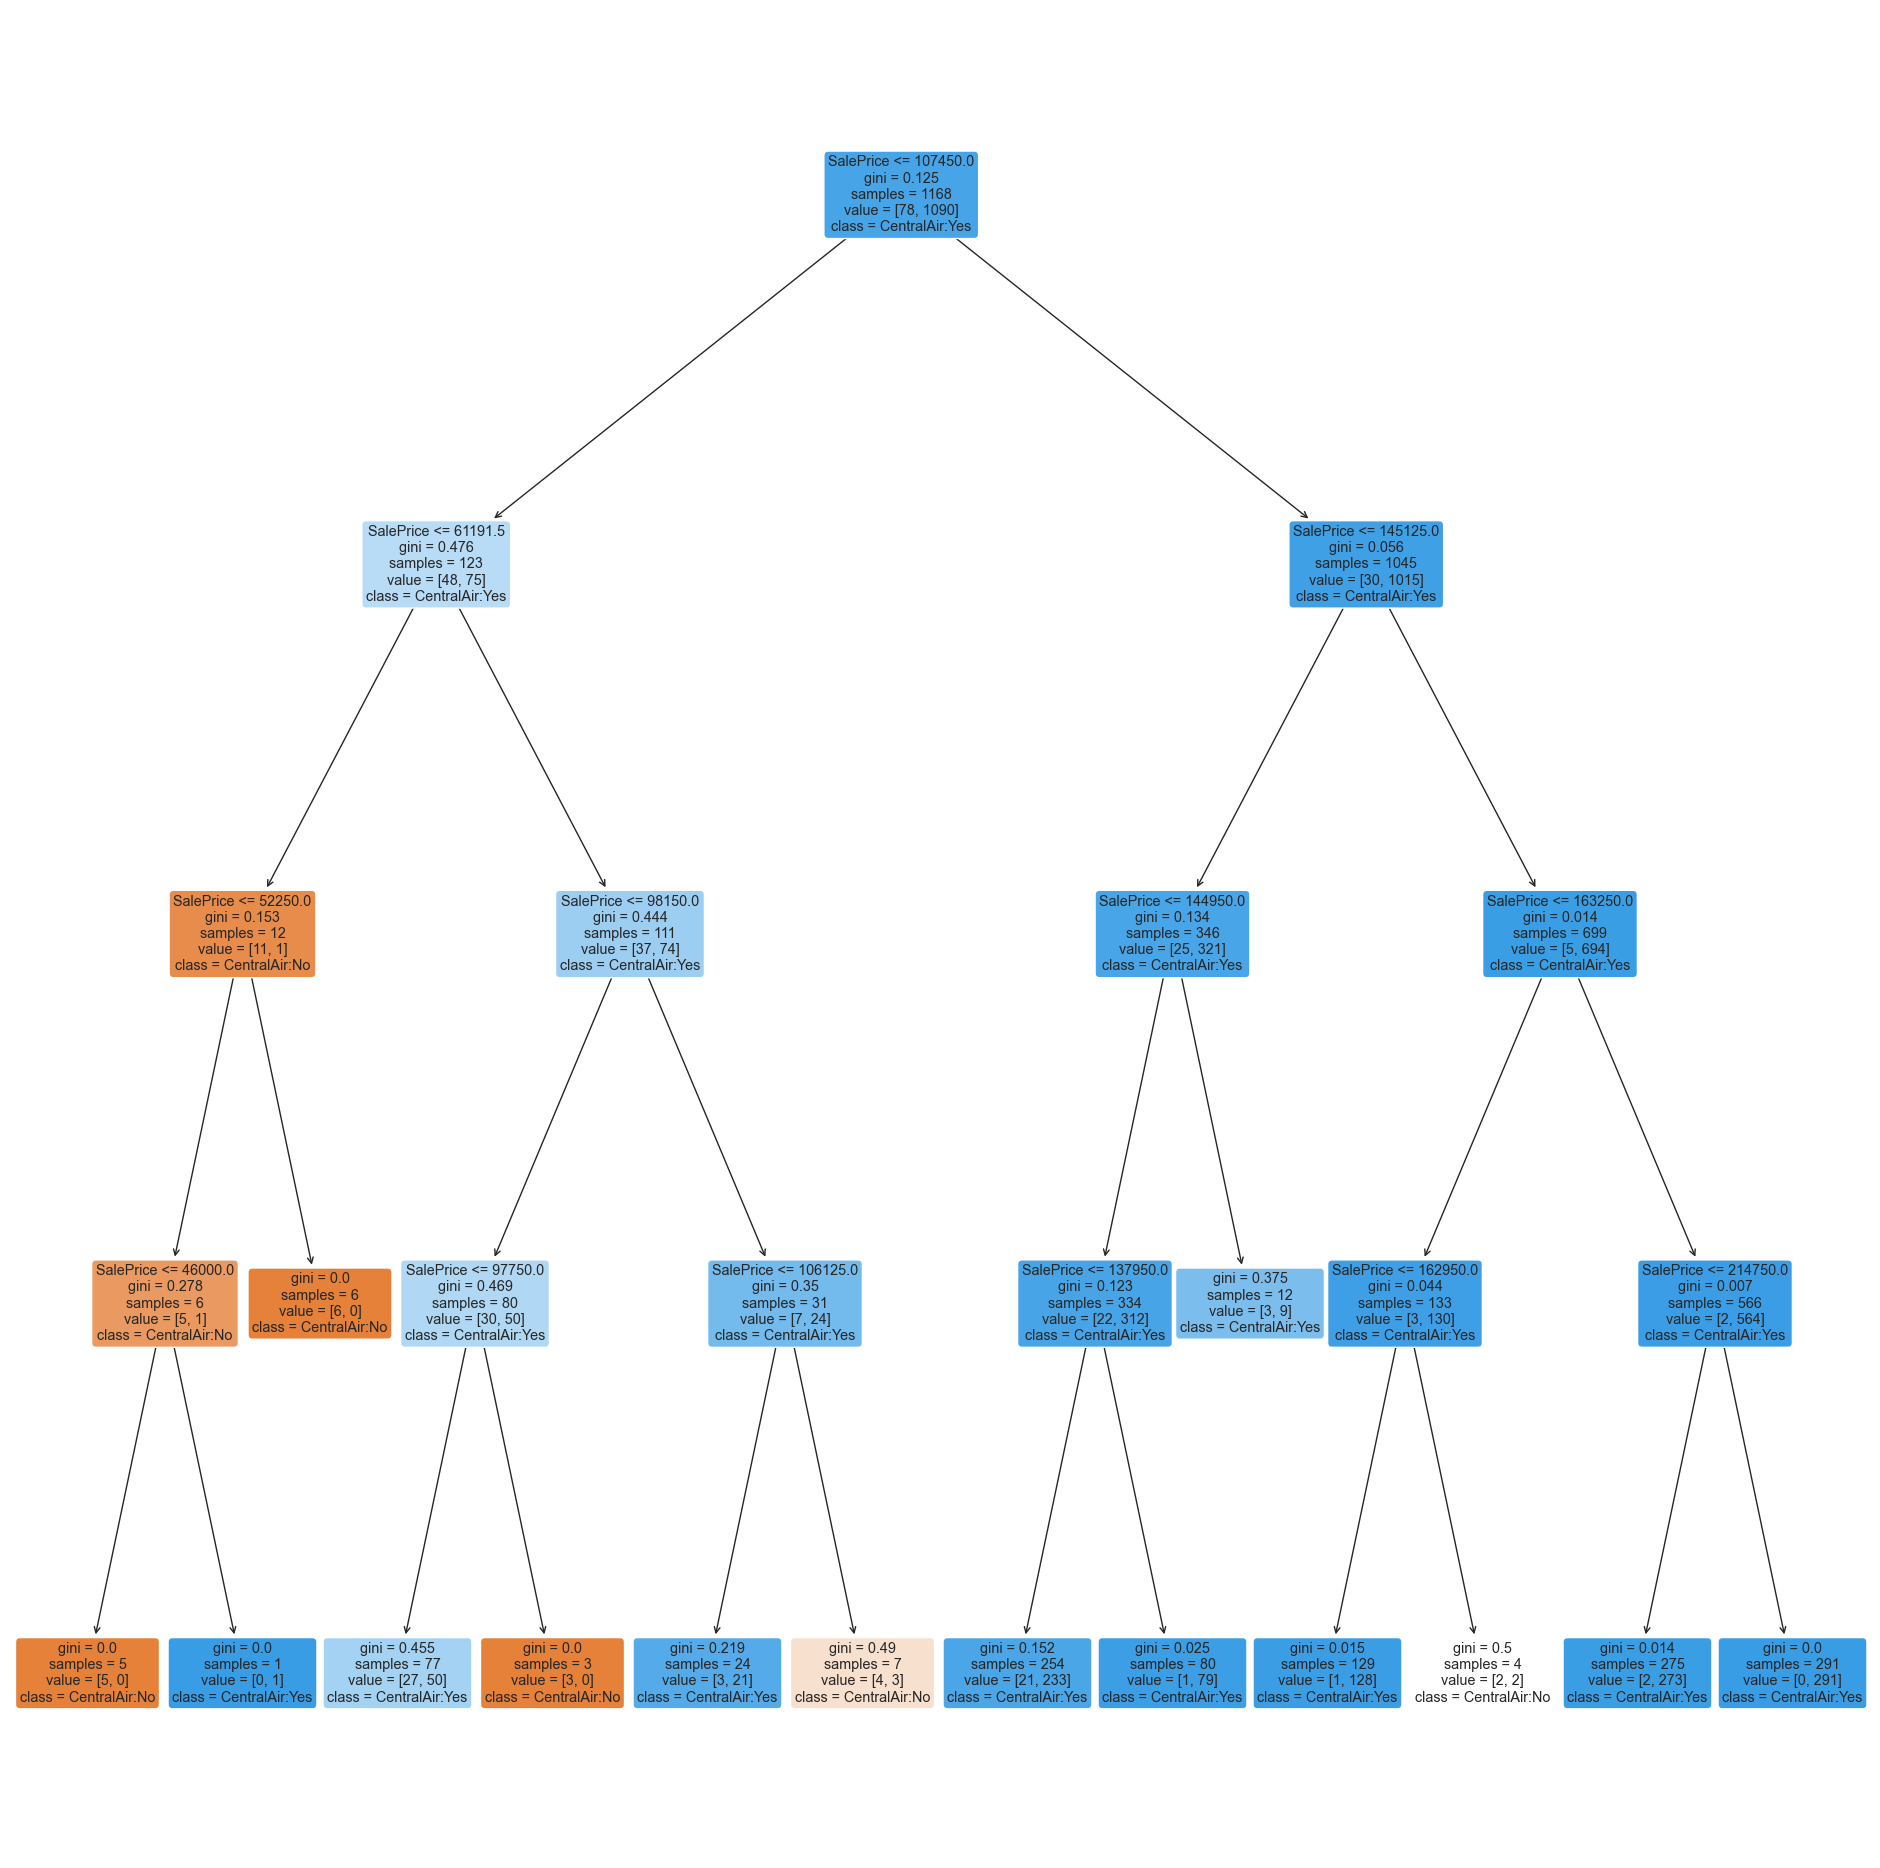

In [186]:
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CentralAir
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["CentralAir:No","CentralAir:Yes"])
plt.show()

### The leaf with the maximal false positive is the leaf with the condition:
### 61191.5 < SalePrice < 97750.0
### There are 27 false positives in this leaf

In [191]:
reduced = pd.DataFrame()

reduced = joint

reduced = reduced[reduced['SalePrice'] <= 97750]
reduced = reduced[reduced['SalePrice'] > 61191.5]

print(reduced.shape)

pd.set_option('display.max_rows', None)
print(reduced)

(77, 2)
      SalePrice CentralAir
235       89500          Y
97        94750          Y
821       93000          N
17        90000          Y
736       93500          N
658       97500          Y
514       96500          N
127       87000          Y
915       75000          Y
1449      92000          Y
528       86000          Y
1090      92900          N
649       84500          Y
1022      87000          Y
750       96500          Y
912       88000          N
1186      95000          Y
479       89471          Y
1179      93000          Y
1378      83000          Y
637       93000          Y
620       67000          N
1013      85000          N
308       82500          Y
250       76500          Y
341       82000          Y
98        83000          N
344       85000          Y
1144      80000          N
1321      72500          N
242       79000          N
434       81000          Y
676       87000          N
638       85000          Y
325       87000          N
935       79900     

In [198]:
filtered = pd.DataFrame()
filtered = reduced

filtered = filtered[filtered['CentralAir'] == 'N']

print(filtered.shape)

print(filtered)

(27, 2)
      SalePrice CentralAir
821       93000          N
736       93500          N
514       96500          N
1090      92900          N
912       88000          N
620       67000          N
1013      85000          N
98        83000          N
1144      80000          N
1321      72500          N
242       79000          N
676       87000          N
325       87000          N
155       79000          N
1062      90000          N
264       73000          N
438       90350          N
383       76000          N
39        82000          N
352       95000          N
342       87500          N
1376      91000          N
1412      90000          N
998       91000          N
29        68500          N
88        85000          N
1035      84000          N
